# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


In [0]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [0]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [0]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [0]:
model = Sequential()

In [0]:
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [0]:
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [11]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [0]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [34]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=20, batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 2s - loss: 0.0029 - acc: 0.9995 - val_loss: 0.0957 - val_acc: 0.9791
Epoch 2/20
 - 2s - loss: 0.0013 - acc: 0.9999 - val_loss: 0.0954 - val_acc: 0.9795
Epoch 3/20
 - 2s - loss: 4.7567e-04 - acc: 1.0000 - val_loss: 0.0939 - val_acc: 0.9803
Epoch 4/20
 - 2s - loss: 3.3304e-04 - acc: 1.0000 - val_loss: 0.0940 - val_acc: 0.9808
Epoch 5/20
 - 2s - loss: 2.9305e-04 - acc: 1.0000 - val_loss: 0.0964 - val_acc: 0.9802
Epoch 6/20
 - 2s - loss: 2.5423e-04 - acc: 1.0000 - val_loss: 0.0965 - val_acc: 0.9802
Epoch 7/20
 - 2s - loss: 2.3473e-04 - acc: 1.0000 - val_loss: 0.0974 - val_acc: 0.9803
Epoch 8/20
 - 2s - loss: 1.9820e-04 - acc: 1.0000 - val_loss: 0.0988 - val_acc: 0.9798
Epoch 9/20
 - 2s - loss: 1.7537e-04 - acc: 1.0000 - val_loss: 0.1008 - val_acc: 0.9802
Epoch 10/20
 - 2s - loss: 1.5520e-04 - acc: 1.0000 - val_loss: 0.1000 - val_acc: 0.9801
Epoch 11/20
 - 2s - loss: 1.4300e-04 - acc: 1.0000 - val_loss: 0.1008 - val_acc: 0.9798

# 以圖形顯示訓練過程

In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

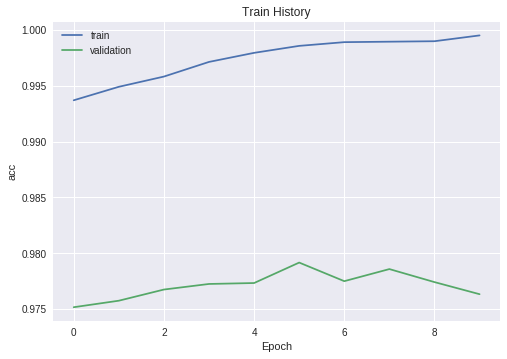

In [16]:
show_train_history(train_history,'acc','val_acc')

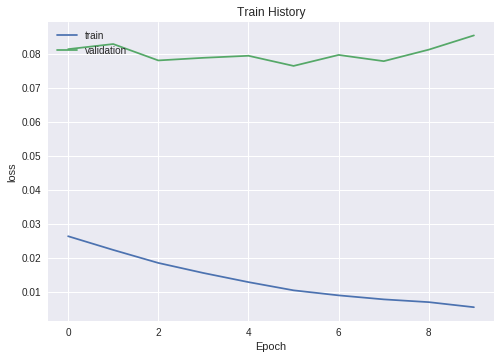

In [17]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [18]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 44us/step

accuracy= 0.9772


# 進行預測

In [0]:
prediction=model.predict_classes(x_Test)

In [20]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

In [0]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

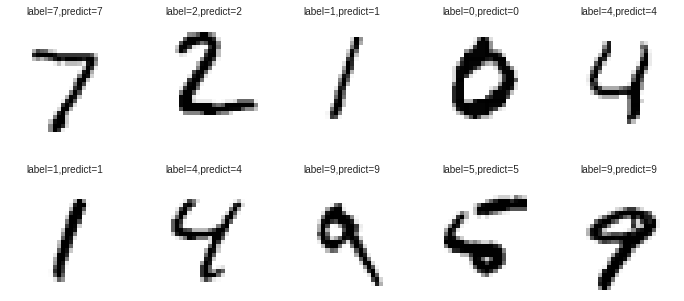

In [23]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=0)

# confusion matrix

In [24]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,1,1,0,2,1,3,0
1,0,1130,2,0,0,1,2,0,0,0
2,6,1,1002,5,3,0,3,8,4,0
3,0,0,1,991,0,3,0,5,1,9
4,1,1,3,1,955,0,3,3,0,15
5,2,0,0,12,1,868,2,2,3,2
6,6,3,2,2,3,5,937,0,0,0
7,0,3,5,3,0,0,0,1010,1,6
8,5,2,5,11,6,8,2,8,917,10


In [25]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [26]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
1670,5,3
2597,5,3
2810,5,3
3117,5,3
3902,5,3
4271,5,3
4360,5,3


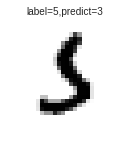

In [27]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=340,num=1)

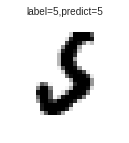

In [35]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=9982,num=1)

In [39]:
!ls "/content/drive/My Drive/"

 02
 11578_APP程式設計.pptx
 1508727740046.jpg
 1512470783154.jpg
 1512470786760.jpg
 1538760479492.jpeg
 1538760688076.jpeg
 1538760694417.jpeg
 7.png
 Ch01.doc
'Ch01 - N.doc'
 Ch02.doc
'Ch02 - N.doc'
 Ch03.doc
'Ch03 - N.doc'
'Colab Notebooks'
 IMAG0194.jpg
 IMAG0401.jpg
 IMAG0402.jpg
 IMAG0403.jpg
 IMAG0404.jpg
 IMAG0405.jpg
 IMAG0406.jpg
 IMAG0407.jpg
 IMAG0408.jpg
 IMAG0432.jpg
 IMG_20180330_200801_1.jpg
 IMG_20180601_144722_1.jpg
 IMG_20180601_144729.jpg
 IMG_20180601_145447_1.jpg
 IMG_20180601_145457_1.jpg
 IMG_20180601_145550_1.jpg
 IMG_20180601_145720_1.jpg
 IMG_20180601_145845_1.jpg
 IMG_20180601_145906_1.jpg
 IMG_20180601_145948.jpg
 IMG_20180601_150030_1.jpg
 IMG_20180601_150201.jpg
 IMG_20180601_150337.jpg
 IMG_20180601_150434_1.jpg
 IMG_20180601_151859_1.jpg
 IMG_20180601_154214.jpg
 IMG_20180601_154344_1.jpg
 IMG_20180927_142955.jpg
 IMG_20180927_143018.jpg
 IMG_20180927_151005.jpg
 IMG_20180927_152533.jpg
 IMG_20181006_012008.jpg
 IMG_20181006_012110.jpg
 LINE_MOVIE_15250059

In [40]:
cd  "/content/drive/My Drive/Colab Notebooks/"

/content/drive/My Drive/Colab Notebooks


In [41]:
!ls

 7.png				    Keras_Mnist_MLP_h256.ipynb
 image.ipynb			    oop.ipynb
 Keras_Imdb_MLP.ipynb		    plotcurves.ipynb
'Keras_Mnist_Introduce (1).ipynb'   Tensorflow_Mnist_MLP_h256.ipynb
 Keras_Mnist_Introduce.ipynb


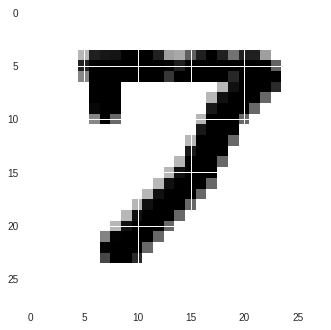

In [42]:
# plot image
import matplotlib.pyplot as plt
from matplotlib.image import imread
img = imread('7.png') # 画像の読み込み

plt.imshow(img)
plt.show()